# Auslagerung - Verzierungselemente

In [9]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from mpl_toolkits.axes_grid1 import make_axes_locatable

con = sqlite3.connect("../data/CongoDB.sqlite")

## Darstellungsweise

In [2]:
sql = """SELECT
            t_Obj.objID,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'MUN')
            AND ((t_Komplex.bef_nr) = '87/3')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Verz.verzName) Like 'V%')
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,verzName,pos
0,428,V03b,2 Rand
1,428,V01a,6 Bauch
2,428,V02b,6 Bauch
3,428,V12a1,6 Bauch
4,434,V01a,6 Bauch


In [5]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot

verzName,V01a,V01c,V01e,V02b,V03a,V03b,V03c,V09b,V12a1,V12a2
pos,,,,,,,,,,
1 Innen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Rand,5,NaN,NaN,1,NaN,1,1,1,NaN,1
6 Bauch,10,4,1,3,3,NaN,2,NaN,2,1


In [6]:
df_pivot = df_pivot.sort_index(ascending=True)

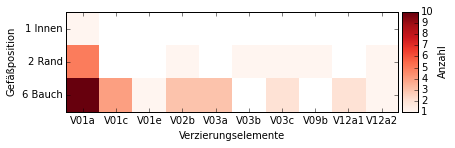

In [7]:
ax = plt.gca()

im = plt.imshow(df_pivot, interpolation='nearest', cmap='Reds')
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='horizontal')
plt.tight_layout()

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anzahl')

plt.show()

In [8]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', fill_value = 0, aggfunc = len)
df_pivot

verzName,V01a,V01c,V01e,V02b,V03a,V03b,V03c,V09b,V12a1,V12a2
pos,,,,,,,,,,
1 Innen,1,0,0,0,0,0,0,0,0,0
2 Rand,5,0,0,1,0,1,1,1,0,1
6 Bauch,10,4,1,3,3,0,2,0,2,1


C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  app.launch_new_instance()


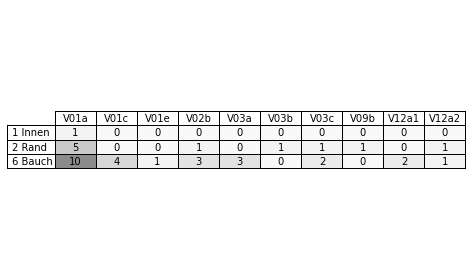

In [9]:
#from matplotlib.table import Table 
vals = np.around(df_pivot.values,2)
normal = plt.normalize(vals.min()-1, vals.max()+1)
# fig = plt.figure(figsize=(15,8))
fig = plt.figure()
fig = fig.add_subplot(111, frameon = False, xticks=[], yticks=[])

fig.table(cellText = vals, rowLabels = df_pivot.index, colLabels = df_pivot.columns, cellColours=plt.cm.Greys(normal(vals), alpha = 0.5), loc='center', cellLoc = 'center')
# leerflächen entfernen:
#  , bbox=[0, 0, 1, 1] ,
plt.tight_layout()

# plt.savefig('output/9-15_MUN87-3_Verzierungselmente_B.pdf', bbox_inches='tight')
plt.show()

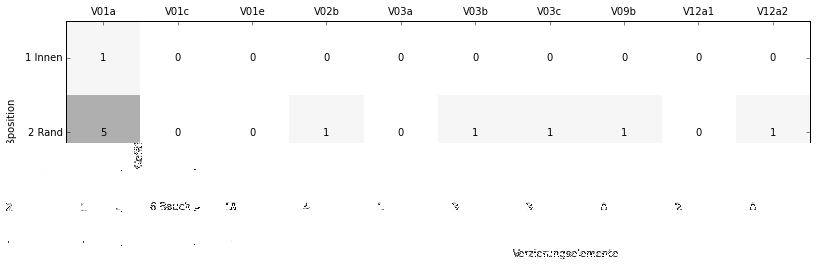

In [10]:
plt.matshow(df_pivot, aspect='auto', cmap ='Greys', alpha = 0.75)
# plt.set(title='Correlation Matrix', xticks=range(num), xticklabels=ticks, yticks=range(num), yticklabels=ticks)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='horizontal')
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')

#for (i, j), z in np.ndenumerate(df_pivot):
#    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
#    bbox=dict(boxstyle='round', facecolor='white'))

for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

# for (i, j), val in np.ndenumerate(df_pivot):
#     ax.annotate('{:0.1f}'.format(val), (j,i), ha='center', va='center', size=25)

# plt.colorbar(orientation='horizontal')
# plt.savefig('output/9-15_MUN87-3_Verzierungselmente_C.pdf', bbox_inches='tight')
plt.show()

## Einträge in Obj-Tab., die in Obj-Pos-Verz-Tab. fehlen

In [30]:
sql = """SELECT
            t_Obj.objID,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (ObjVerz != '/////////')""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [31]:
df[df.isnull().any(axis = 1)]

,objID,verzName,pos,ObjVerz


> --> keine fehlenden Eintragungen mehr in Obj-Pos-Verz-Tabelle (21.07.2015)